1. 读入数据，统计上证50年底的收益率，并选择恰当的方式展示
2. 选取几个典型的企业，展示其年底股价变化趋势
3. 利用聚类或其他方式进行分析，统计哪些企业具有较高的相似性，及具有相似的变化趋势

### 基本设置，包引入，字体，路径，风格设置

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # 统计数据可视化
# 绘图风格： style= ["darkgrid"，"whitegrid"，"dark"，"white"，"ticks"]，默认darkgrid
sns.set_style(style="darkgrid")
# 颜色风格： themes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
sns.set_palette(palette='bright')
ChinaFonts = {"黑体": "simhei", "宋体": "simsun", "华文楷体": "STKAITI"}
plt.rcParams["font.sans-serif"] = ChinaFonts["黑体"]  # 解决中文乱码问题
plt.rcParams["axes.unicode_minus"] = False  # 解决负号无法正常显示的问题
path_data = "/home/carton/workspace/python/Multivariate-statistical-analysis/database/期末考核/"  # 设置 数据路径
path_pic = "/home/carton/workspace/python/Multivariate-statistical-analysis/save-database/期末考核/"  # 设置 图像保存路径

### 读入数据

In [3]:
file_path0 = path_data + "上证50_20230113.xlsx"
df_data0 = pd.read_excel(file_path0)
df_data0.head()

,上证50
0,包钢股份(600010)
1,三一重工(600031)
2,上汽集团(600104)
3,恒瑞医药(600276)
4,国电南瑞(600406)


In [4]:
file_path1 = path_data + "上证50年底交易数据.xlsx"
df_data1 = pd.read_excel(file_path1)
df_data1.head()

,日期,包钢股份,三一重工,上汽集团,恒瑞医药,国电南瑞,贵州茅台,闻泰科技,航发动力,隆基绿能,...,伊利股份,三峡能源,中国神华,农业银行,中国太保,中国建筑,中国石油,中远海控,合盛硅业,华友钴业
0,2022-12-01,1.98,15.92,15.07,40.47,26.09,1630.80,56.75,45.57,47.01,...,29.91,5.76,29.86,2.86,24.18,5.74,5.19,12.62,91.19,65.50
1,2022-12-02,1.98,15.70,15.06,40.50,26.23,1633.88,55.49,44.20,47.98,...,29.74,5.78,29.39,2.86,23.85,5.68,5.20,12.55,91.11,63.23
2,2022-12-05,2.06,16.32,15.26,39.88,26.38,1664.90,56.95,44.40,46.36,...,30.64,5.82,29.83,2.89,25.34,6.11,5.32,13.03,92.26,62.80
3,2022-12-06,2.04,16.24,15.29,39.88,26.73,1688.00,57.72,45.10,45.86,...,31.18,5.76,29.95,2.89,25.44,5.97,5.28,13.09,96.72,62.84
4,2022-12-07,2.00,16.04,15.23,40.58,26.71,1684.00,56.80,45.02,45.93,...,31.58,5.69,29.24,2.88,24.85,5.88,5.19,13.39,96.88,64.94


### 计算收益率

In [5]:
for i, row in df_data0.iterrows():
    # 去除row[0]中的括号及括号内的内容
    row[0] = row[0].split("(")[0]
    df_data0.loc[i, "月收益率"] = df_data1.loc[21, row[0]] - df_data1.loc[0, row[0]]
df_data0.head()

,上证50,月收益率
0,包钢股份,-0.06
1,三一重工,-0.12
2,上汽集团,-0.66
3,恒瑞医药,-1.94
4,国电南瑞,-1.69


### 按收益率从高到低进行展示

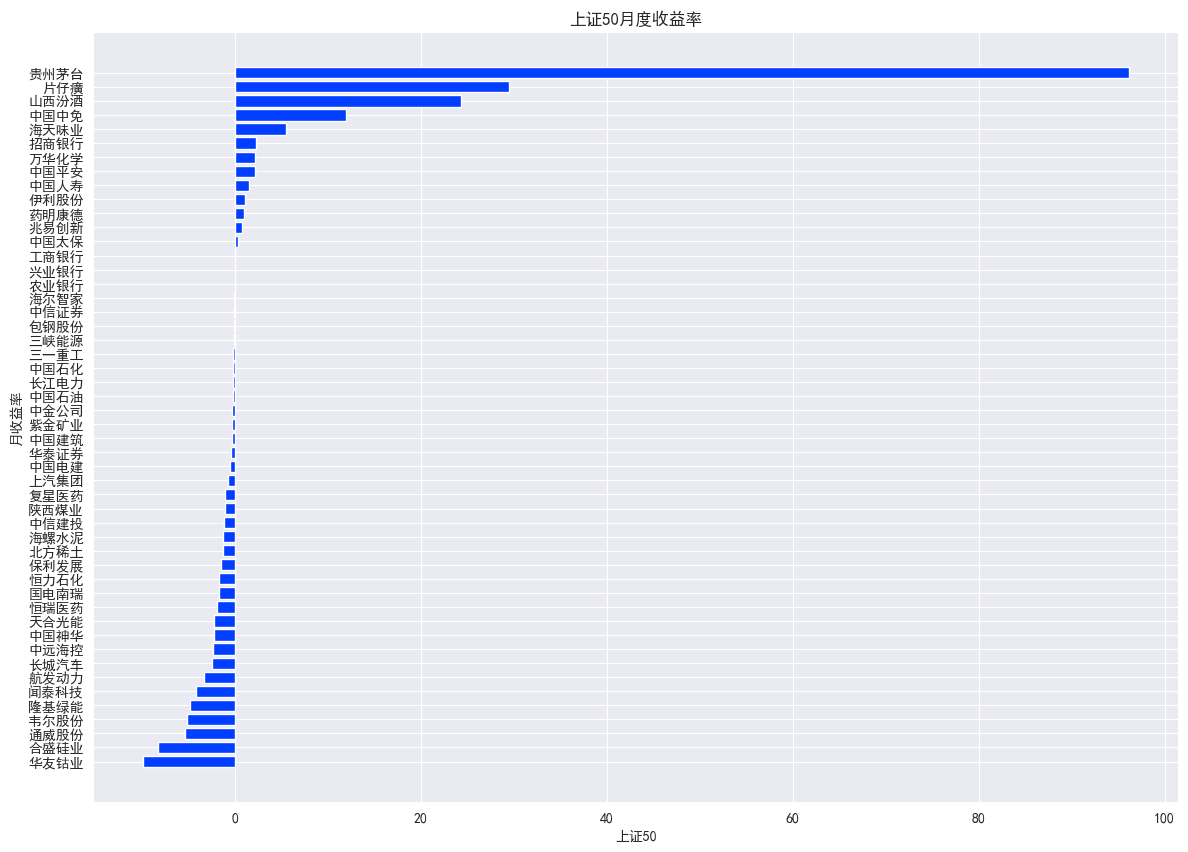

In [6]:
df_data0.sort_values(by="月收益率", ascending=True, inplace=True) # inplace=True 直接在原数据上进行修改
plt.figure(figsize=(14, 10))
plt.barh(df_data0["上证50"], df_data0["月收益率"])
plt.title("上证50月度收益率")
plt.xlabel("上证50")
plt.ylabel("月收益率")
# plt.savefig(path_pic + "上证50月度收益率.png")
plt.show()

可以看到贵州茅台的月收益率最高，华友钴业的月收益率最低，进一步分析选取三个企业，绘制其变化趋势图

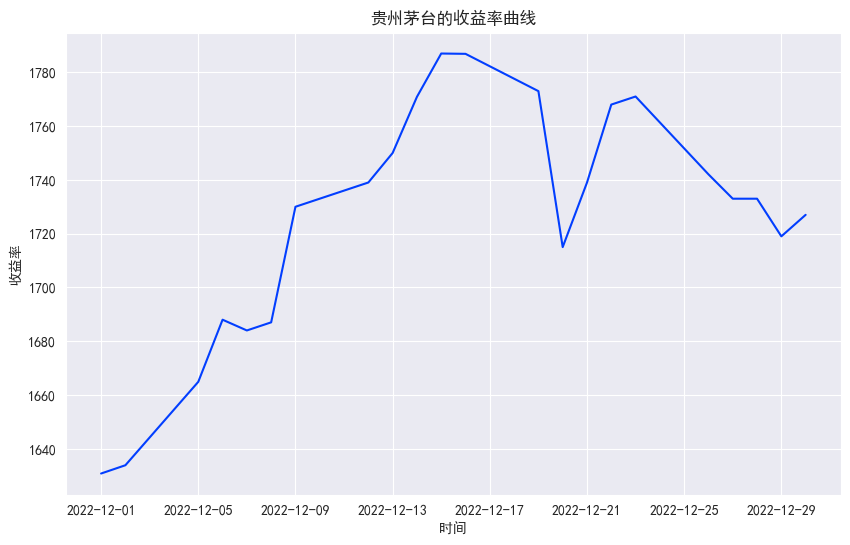

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df_data1["日期"], df_data1["贵州茅台"])
plt.title("贵州茅台的收益率曲线")
plt.xlabel("时间")
plt.ylabel("收益率")
plt.show()

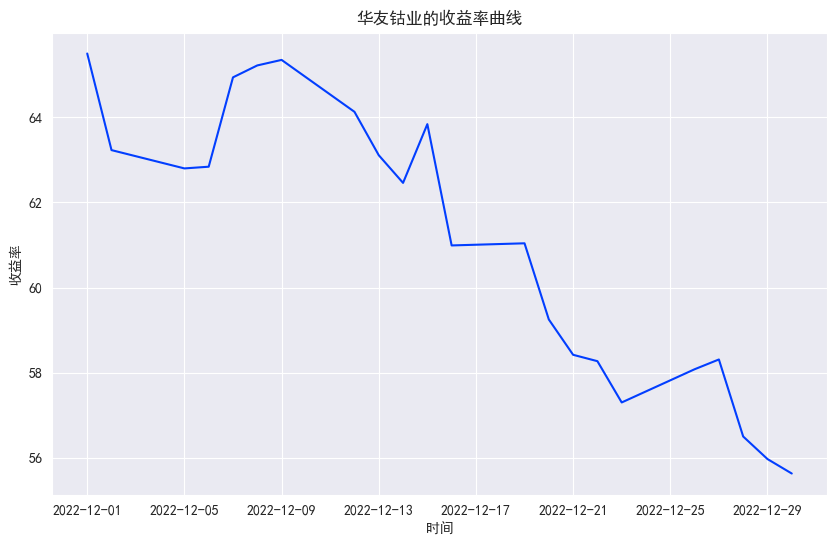

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df_data1["日期"], df_data1["华友钴业"])
plt.title("华友钴业的收益率曲线")
plt.xlabel("时间")
plt.ylabel("收益率")
plt.show()

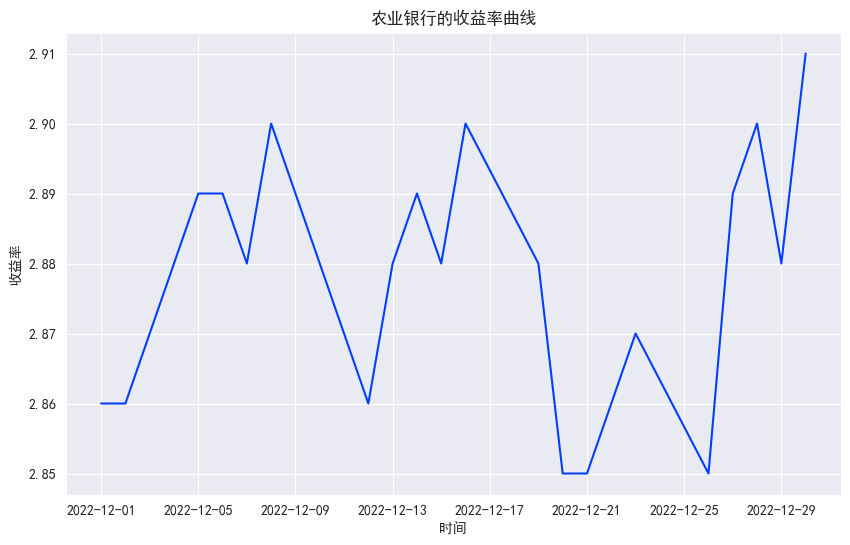

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df_data1["日期"], df_data1["农业银行"])
plt.title("农业银行的收益率曲线")
plt.xlabel("时间")
plt.ylabel("收益率")
plt.show()

### 进行聚类分析

In [10]:
df_data2 = pd.DataFrame(columns=["企业名称"])
df_data2["企业名称"] = df_data1.columns[1:]
for i in range(22):
    df_data2[df_data1["日期"][i]] = df_data1.iloc[i, 1:].values # 转化为矩阵形式
df_data2.head()

,企业名称,2022-12-01 00:00:00,2022-12-02 00:00:00,2022-12-05 00:00:00,2022-12-06 00:00:00,2022-12-07 00:00:00,2022-12-08 00:00:00,2022-12-09 00:00:00,2022-12-12 00:00:00,2022-12-13 00:00:00,...,2022-12-19 00:00:00,2022-12-20 00:00:00,2022-12-21 00:00:00,2022-12-22 00:00:00,2022-12-23 00:00:00,2022-12-26 00:00:00,2022-12-27 00:00:00,2022-12-28 00:00:00,2022-12-29 00:00:00,2022-12-30 00:00:00
0,包钢股份,1.98,1.98,2.06,2.04,2.0,2.0,2.02,1.97,2.04,...,1.93,1.93,1.91,1.88,1.89,1.91,1.96,1.96,1.93,1.92
1,三一重工,15.92,15.7,16.32,16.24,16.04,16.05,16.91,16.62,16.57,...,16.39,15.8,15.99,16.21,16.14,16.21,16.18,15.84,15.66,15.8
2,上汽集团,15.07,15.06,15.26,15.29,15.23,15.24,15.24,15.04,15.11,...,15.03,14.72,14.69,14.77,14.67,14.71,14.76,14.63,14.33,14.41
3,恒瑞医药,40.47,40.5,39.88,39.88,40.58,38.87,38.82,38.88,38.38,...,37.19,36.51,36.14,36.63,36.75,37.56,37.07,37.4,38.13,38.53
4,国电南瑞,26.09,26.23,26.38,26.73,26.71,26.56,26.4,26.14,25.66,...,25.18,24.8,24.47,24.43,24.47,25.64,25.46,25.22,25.17,24.4


In [11]:
rawdata = df_data2
pd.set_option('display.max_columns',None)#显示所有的列
pd.set_option('display.max_rows',None)#显示所有的行
pd.set_option('display.width',200)#为工不换行显示字段，增大横向显示宽度，。设置横向最大显示200字符

In [12]:
from sklearn.cluster import KMeans
x = rawdata.drop(['企业名称'],axis=1)#聚类需要所有变量为数值，因此删掉企业名
#x=pd.read_csv(path0, encoding='gbk',sep='\t')
kmeans = KMeans(n_clusters=5)# 初始化KMeans类
kmeans.fit(x)#训练模型
rawdata['cluster'] = kmeans.predict(x)#计算每个记录所属的簇

/opt/anaconda/envs/data-science/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
print (rawdata.cluster.value_counts())#查看每个簇的个数分布：

0    24
4    16
3     6
2     3
1     1
Name: cluster, dtype: int64


In [14]:
#聚类结果可视化
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
scaled_x = scale(x)#降维前数据标准化，降维效果更好
#PCA降维
pca = PCA(n_components=2)#指定降维后的维度为2维
pca.fit(scaled_x)# 训练PCA
tr = pca.transform(scaled_x)#将数据转换为2维

In [15]:
dataset = pd.concat([pd.DataFrame(tr),rawdata['cluster']],axis=1)
print (dataset)

            0         1  cluster
0   -1.516512  0.017779        0
1   -1.240918  0.012157        0
2   -1.265295  0.009416        0
3   -0.812787 -0.015245        4
4   -1.060293 -0.002068        0
5   31.830999 -0.011483        1
6   -0.479023 -0.027568        4
7   -0.721476 -0.019513        4
8   -0.694150 -0.032709        4
9   -1.215559  0.010413        0
10  -0.661188 -0.001084        4
11  -0.858368  0.008838        4
12  -1.413579  0.010873        0
13   2.602586  0.029708        2
14  -0.807250 -0.004683        4
15  -0.020986  0.004175        3
16   0.416941 -0.011842        3
17  -1.468561  0.016062        0
18  -0.854006  0.016762        4
19  -1.051131 -0.000141        0
20   0.214257 -0.014641        3
21   3.879146  0.103231        2
22  -0.998841 -0.000108        4
23   3.840523  0.029346        2
24  -1.152445  0.007319        0
25  -1.076631 -0.001454        0
26  -1.187133  0.004258        0
27  -1.471732  0.017748        0
28  -0.962134 -0.006924        4
29  -1.303

In [16]:
c0 = dataset[dataset['cluster'] == 0]#筛选出簇类别为0的记录
c1 = dataset[dataset['cluster'] == 1]
c2 = dataset[dataset['cluster'] == 2]
c3 = dataset[dataset['cluster'] == 3]
c4 = dataset[dataset['cluster'] == 4]

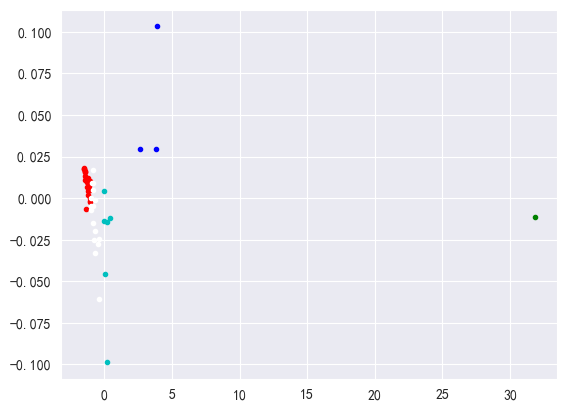

In [17]:
import matplotlib.pyplot as pLt
plt.plot(c0[0],c0[1],'r.',c1[0],c1[1],'g.',c2[0],c2[1],'b.', c3[0],c3[1],'c.', c4[0],c4[1],'w.')#将3个簇绘制到一-张图上。

In [25]:
c0_name = rawdata[rawdata['cluster'] == 0]['企业名称']
c1_name = rawdata[rawdata['cluster'] == 1]['企业名称']
c2_name = rawdata[rawdata['cluster'] == 2]['企业名称']
c3_name = rawdata[rawdata['cluster'] == 3]['企业名称']
c4_name = rawdata[rawdata['cluster'] == 4]['企业名称']
print(c0_name)
print(c1_name)
print(c2_name)
print(c3_name)
print(c4_name)

0     包钢股份
1     三一重工
2     上汽集团
4     国电南瑞
9     兴业银行
12    中国电建
17    中国石化
19    北方稀土
24    长江电力
25    中信建投
26    陕西煤业
27    工商银行
29    华泰证券
30    紫金矿业
34    中信证券
35    保利发展
37    恒力石化
39    海尔智家
41    三峡能源
43    农业银行
44    中国太保
45    中国建筑
46    中国石油
47    中远海控
Name: 企业名称, dtype: object
5    贵州茅台
Name: 企业名称, dtype: object
13    中国中免
21     片仔癀
23    山西汾酒
Name: 企业名称, dtype: object
15    海天味业
16    兆易创新
20    万华化学
31    药明康德
32    韦尔股份
48    合盛硅业
Name: 企业名称, dtype: object
3     恒瑞医药
6     闻泰科技
7     航发动力
8     隆基绿能
10    中国平安
11    中国人寿
14    中金公司
18    招商银行
22    海螺水泥
28    长城汽车
33    天合光能
36    复星医药
38    通威股份
40    伊利股份
42    中国神华
49    华友钴业
Name: 企业名称, dtype: object
